In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df1 = pd.read_csv('final1.csv')
df1.head()

,Unnamed: 0,Region_Code,SpatialDimValueCode,Location,Period,Sex,Age_Group,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP
0,0,AMR,BRA,Brazil,2000,Female,1-4 years,7420561.0,76.18,97402.0,388666.0,0.0010,392.3,0.004,1653572400000
1,1,AMR,BRA,Brazil,2000,Female,10-14 years,6547182.0,67.58,96875.0,484035.0,0.0003,137.0,0.001,1653572400000
2,2,AMR,BRA,Brazil,2000,Female,15-19 years,6063147.0,62.68,96739.0,483101.0,0.0005,236.7,0.002,1653572400000
3,3,AMR,BRA,Brazil,2000,Female,20-24 years,5580047.0,57.82,96502.0,481748.0,0.0006,304.5,0.003,1653572400000
4,4,AMR,BRA,Brazil,2000,Female,25-29 years,5098299.0,53.00,96197.0,480046.0,0.0008,376.4,0.004,1653572400000


In [53]:
df1.columns

Index(['Unnamed: 0', 'Region_Code', 'SpatialDimValueCode', 'Location',
       'Period', 'Sex', 'Age_Group', 'Tx - person-years lived above age x',
       'ex - expectation of life at age x',
       'lx - number of people left alive at age x',
       'nLx - person-years lived between ages x and x+n',
       'nMx - age-specific death rate between ages x and x+n',
       'ndx - number of people dying between ages x and x+n',
       'nqx - probability of dying between ages x and x+n', 'GDP'],
      dtype='object')

In [54]:
df1 = df1.drop(['Unnamed: 0', 'Region_Code', 'SpatialDimValueCode'], axis=1)

In [55]:
df1['Period'] = pd.Categorical(df1['Period'].astype(str))
df1.dtypes

Location                                                  object
Period                                                  category
Sex                                                       object
Age_Group                                                 object
Tx - person-years lived above age x                      float64
ex - expectation of life at age x                        float64
lx - number of people left alive at age x                float64
nLx - person-years lived between ages x and x+n          float64
nMx - age-specific death rate between ages x and x+n     float64
ndx - number of people dying between ages x and x+n      float64
nqx - probability of dying between ages x and x+n        float64
GDP                                                        int64
dtype: object

In [56]:
df1

,Location,Period,Sex,Age_Group,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP
0,Brazil,2000,Female,1-4 years,7420561.0,76.18,97402.0,388666.0,0.0010,392.3,0.004,1653572400000
1,Brazil,2000,Female,10-14 years,6547182.0,67.58,96875.0,484035.0,0.0003,137.0,0.001,1653572400000
2,Brazil,2000,Female,15-19 years,6063147.0,62.68,96739.0,483101.0,0.0005,236.7,0.002,1653572400000
3,Brazil,2000,Female,20-24 years,5580047.0,57.82,96502.0,481748.0,0.0006,304.5,0.003,1653572400000
4,Brazil,2000,Female,25-29 years,5098299.0,53.00,96197.0,480046.0,0.0008,376.4,0.004,1653572400000
...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,1345405.0,15.97,84223.0,402477.0,0.0190,7455.0,0.089,5036891000000
2086,Japan,2019,Male,75-79 years,942929.0,12.28,76768.0,354743.0,0.0330,11638.0,0.150,5036891000000
2087,Japan,2019,Male,80-84 years,588185.0,9.03,65130.0,282238.0,0.0620,17364.0,0.270,5036891000000
2088,Japan,2019,Male,85+ years,305948.0,6.41,47765.0,305948.0,0.1400,47765.0,1.000,5036891000000


In [57]:
df1.nunique()

Location                                                  11
Period                                                     5
Sex                                                        2
Age_Group                                                 19
Tx - person-years lived above age x                     2090
ex - expectation of life at age x                       1832
lx - number of people left alive at age x               1861
nLx - person-years lived between ages x and x+n         2063
nMx - age-specific death rate between ages x and x+n     123
ndx - number of people dying between ages x and x+n     1992
nqx - probability of dying between ages x and x+n        149
GDP                                                       55
dtype: int64

In [58]:
df1['Location'].unique()

array(['Brazil', 'Mexico', 'United States of America', 'Germany',
       'France', 'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Indonesia', 'India', 'China', 'Japan'],
      dtype=object)

In [59]:
df1['Period'].unique()

['2000', '2005', '2010', '2015', '2019']
Categories (5, object): ['2000', '2005', '2010', '2015', '2019']

In [60]:
df1['Age_Group'].unique()

array(['1-4 years', '10-14 years', '15-19  years', '20-24 years',
       '25-29 years', '30-34 years', '35-39 years', '40-44 years',
       '45-49 years', '5-9 years', '50-54 years', '55-59 years',
       '60-64 years', '65-69 years', '70-74 years', '75-79 years',
       '80-84 years', '85+ years', '<1 year'], dtype=object)

In [48]:
#df1.isnull().sum()  # There is no null value, GREAT JOB!

In [61]:
# Assign a mid point for Age, to make it easier for analysis
df1['Age_Midpoint'] = df1['Age_Group'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1].split()[0])) / 2 if '-' in x else (0.5 if '<' in x else (85 if '>' in x else int(x.split('+')[0]))))
df1

,Location,Period,Sex,Age_Group,Tx - person-years lived above age x,ex - expectation of life at age x,lx - number of people left alive at age x,nLx - person-years lived between ages x and x+n,nMx - age-specific death rate between ages x and x+n,ndx - number of people dying between ages x and x+n,nqx - probability of dying between ages x and x+n,GDP,Age_Midpoint
0,Brazil,2000,Female,1-4 years,7420561.0,76.18,97402.0,388666.0,0.0010,392.3,0.004,1653572400000,2.5
1,Brazil,2000,Female,10-14 years,6547182.0,67.58,96875.0,484035.0,0.0003,137.0,0.001,1653572400000,12.0
2,Brazil,2000,Female,15-19 years,6063147.0,62.68,96739.0,483101.0,0.0005,236.7,0.002,1653572400000,17.0
3,Brazil,2000,Female,20-24 years,5580047.0,57.82,96502.0,481748.0,0.0006,304.5,0.003,1653572400000,22.0
4,Brazil,2000,Female,25-29 years,5098299.0,53.00,96197.0,480046.0,0.0008,376.4,0.004,1653572400000,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,1345405.0,15.97,84223.0,402477.0,0.0190,7455.0,0.089,5036891000000,72.0
2086,Japan,2019,Male,75-79 years,942929.0,12.28,76768.0,354743.0,0.0330,11638.0,0.150,5036891000000,77.0
2087,Japan,2019,Male,80-84 years,588185.0,9.03,65130.0,282238.0,0.0620,17364.0,0.270,5036891000000,82.0
2088,Japan,2019,Male,85+ years,305948.0,6.41,47765.0,305948.0,0.1400,47765.0,1.000,5036891000000,85.0


In [67]:
df1['LifeExpectancy'] = df1['Age_Midpoint'] + df1['ex - expectation of life at age x']
df2 = df1[['Location', 'Period', 'Sex', 'Age_Group', 'LifeExpectancy','GDP']]
df2
#df2.columns

,Location,Period,Sex,Age_Group,LifeExpectancy,GDP
0,Brazil,2000,Female,1-4 years,78.68,1653572400000
1,Brazil,2000,Female,10-14 years,79.58,1653572400000
2,Brazil,2000,Female,15-19 years,79.68,1653572400000
3,Brazil,2000,Female,20-24 years,79.82,1653572400000
4,Brazil,2000,Female,25-29 years,80.00,1653572400000
...,...,...,...,...,...,...
2085,Japan,2019,Male,70-74 years,87.97,5036891000000
2086,Japan,2019,Male,75-79 years,89.28,5036891000000
2087,Japan,2019,Male,80-84 years,91.03,5036891000000
2088,Japan,2019,Male,85+ years,91.41,5036891000000


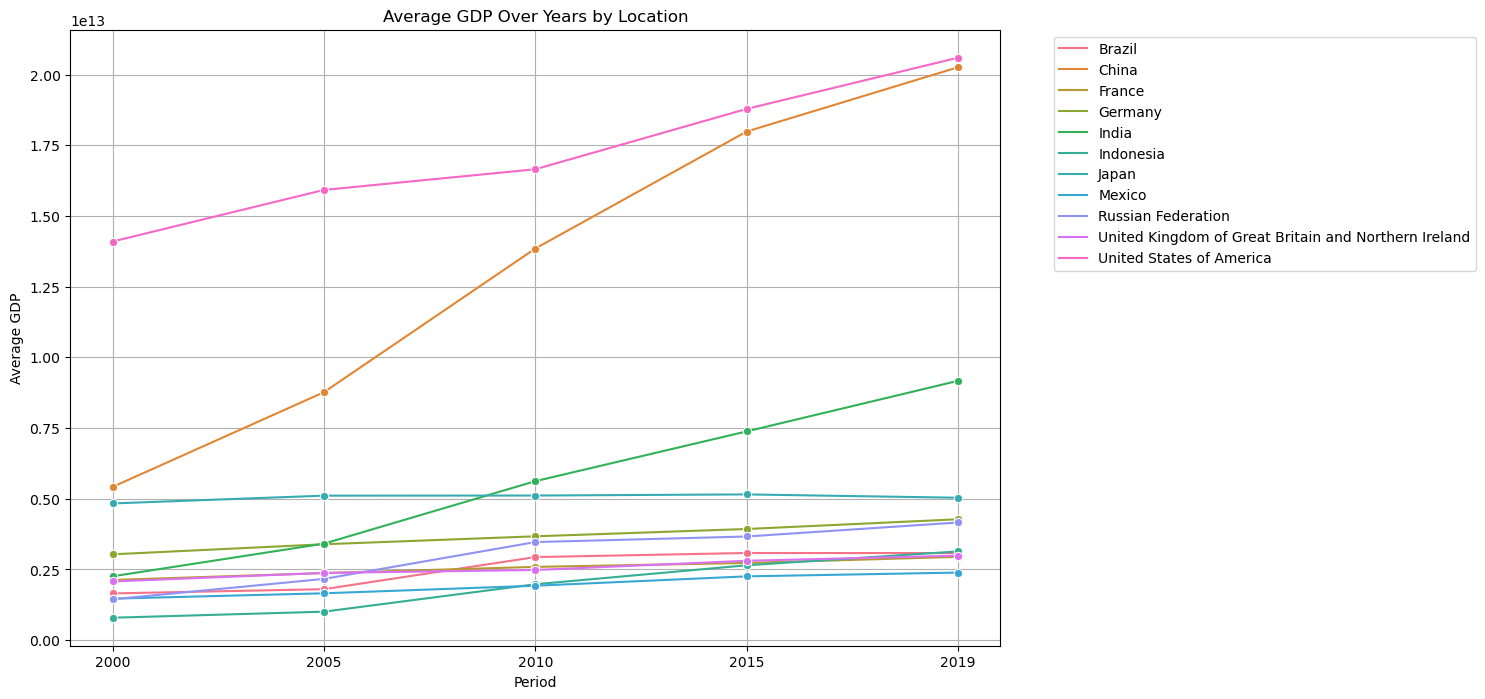

In [93]:
df_gdp = df2.groupby(['Location', 'Period'])['GDP'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Period', y='GDP', hue='Location', data=df_gdp, marker='o')
plt.title('Average GDP Over Years by Location')
plt.xlabel('Period')
plt.ylabel('Average GDP')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

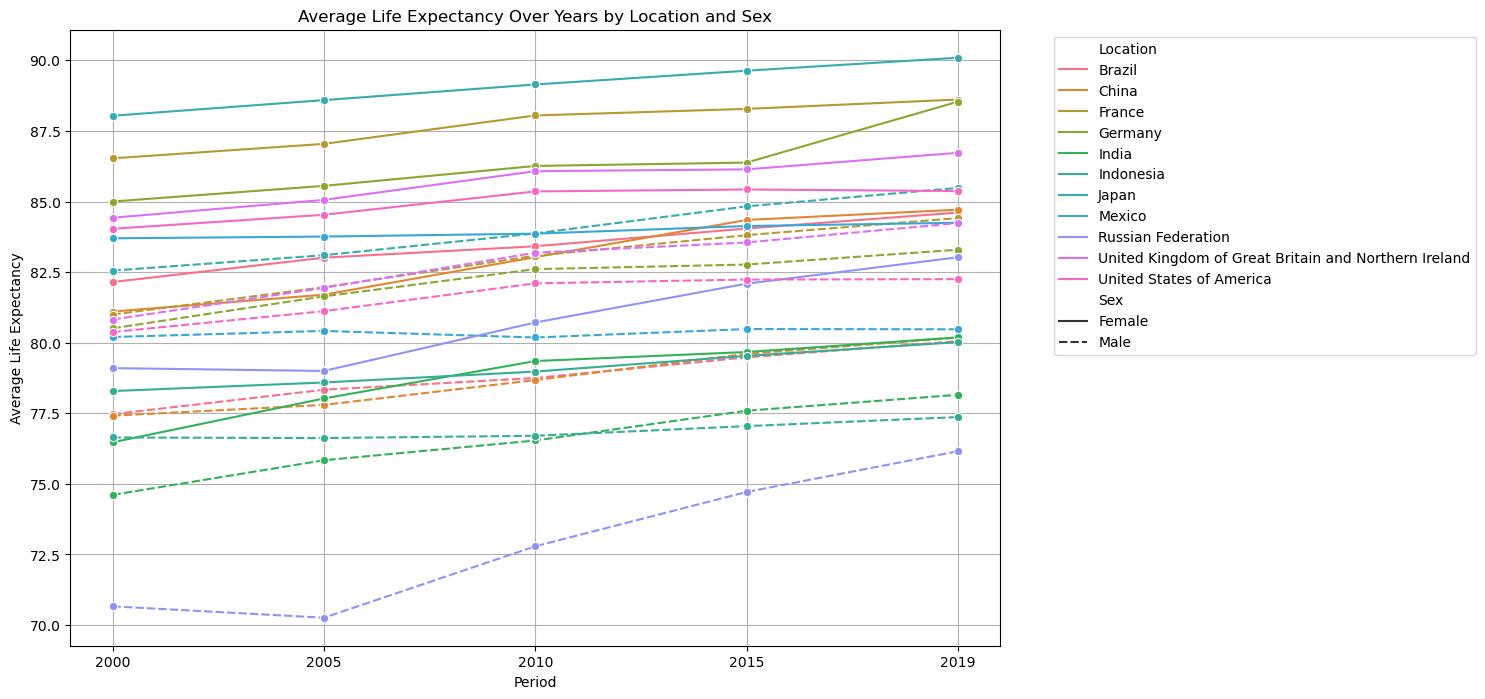

In [72]:
# Life Expectancy w/ sex
df_life = df2.groupby(['Location', 'Period', 'Sex'], as_index=False)['LifeExpectancy'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Period', y='LifeExpectancy', hue='Location', style='Sex', data=df_life, marker='o')
plt.title('Average Life Expectancy Over Years by Location and Sex')
plt.xlabel('Period')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


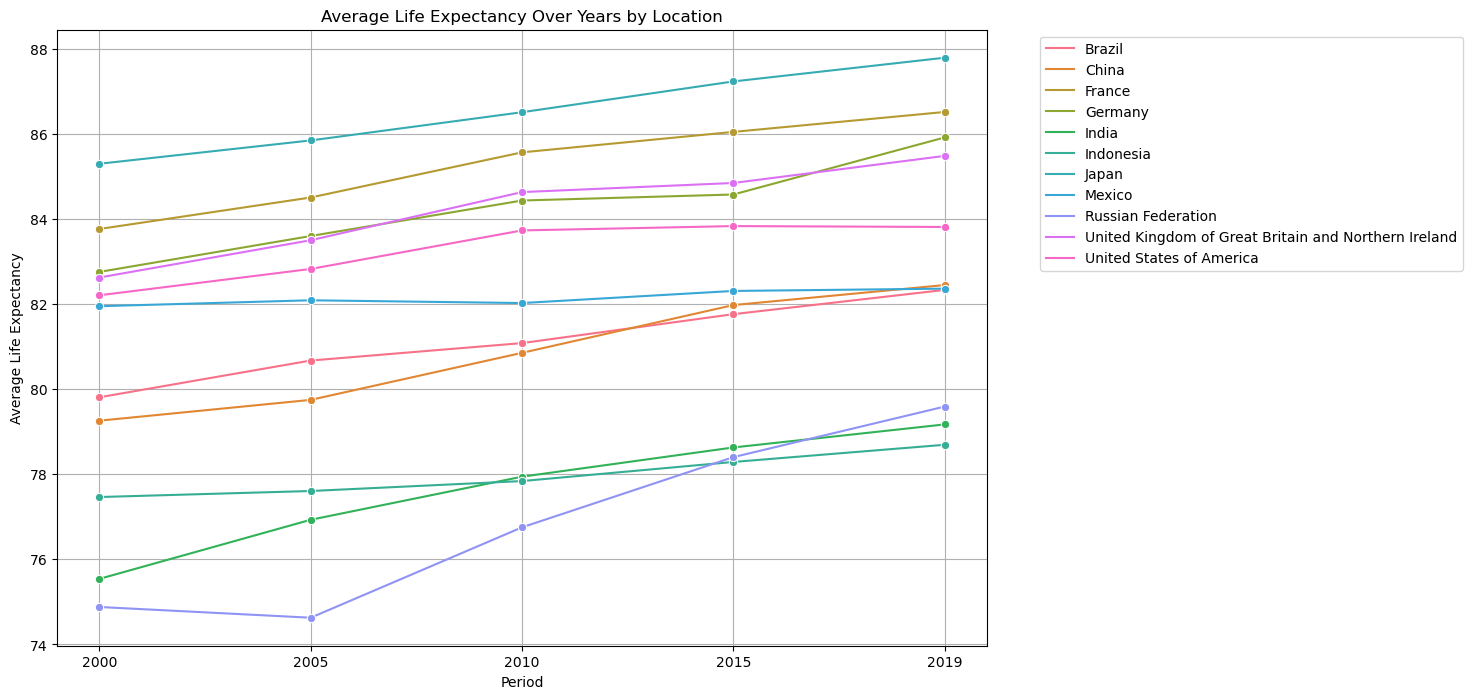

In [96]:
# Life Expectancy without Sex difference
df_life2 = df2.groupby(['Location', 'Period'], as_index=False)['LifeExpectancy'].mean()

plt.figure(figsize=(12, 8))
sns.lineplot(x='Period', y='LifeExpectancy', hue='Location', data=df_life2, marker='o')
plt.title('Average Life Expectancy Over Years by Location')
plt.xlabel('Period')
plt.ylabel('Average Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


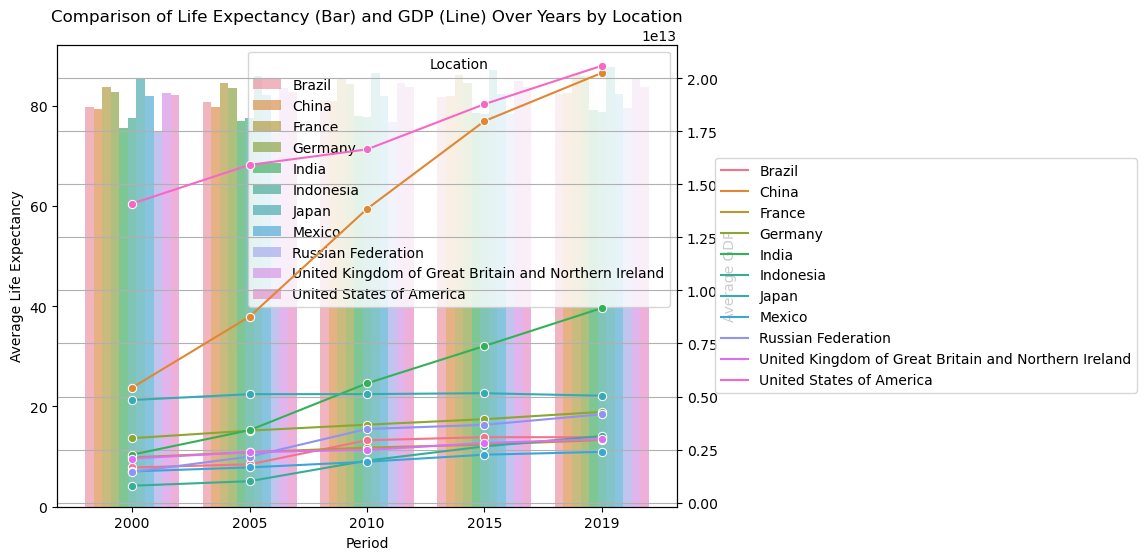

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建包含所需列的 DataFrame
df_life2 = df2.groupby(['Location', 'Period'], as_index=False)['LifeExpectancy'].mean()
df_gdp = df2.groupby(['Location', 'Period'])['GDP'].mean().reset_index()

# 可视化
plt.figure(figsize=(8, 6))

# 绘制 'LifeExpectancy' 的柱状图
sns.barplot(x='Period', y='LifeExpectancy', hue='Location', data=df_life2, alpha=0.7)
plt.xlabel('Period')
plt.ylabel('Average Life Expectancy')

# 创建右轴用于 'GDP'
ax2 = plt.twinx()
sns.lineplot(x='Period', y='GDP', hue='Location', data=df_gdp, marker='o', ax=ax2)
ax2.set_ylabel('Average GDP')

plt.title('Comparison of Life Expectancy (Bar) and GDP (Line) Over Years by Location')
ax2.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))  # 调整右侧 y 轴的图例位置
plt.grid(True)
plt.show()



/var/folders/94/s_521g291tv9nnx7jvql6hdm0000gq/T/ipykernel_94328/3914482216.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='GDP', hue='Sex', data=df_gdp, ci=None, dodge=True, order=df_life.groupby('Location')['LifeExpectancy'].mean().sort_values(ascending=False).index)


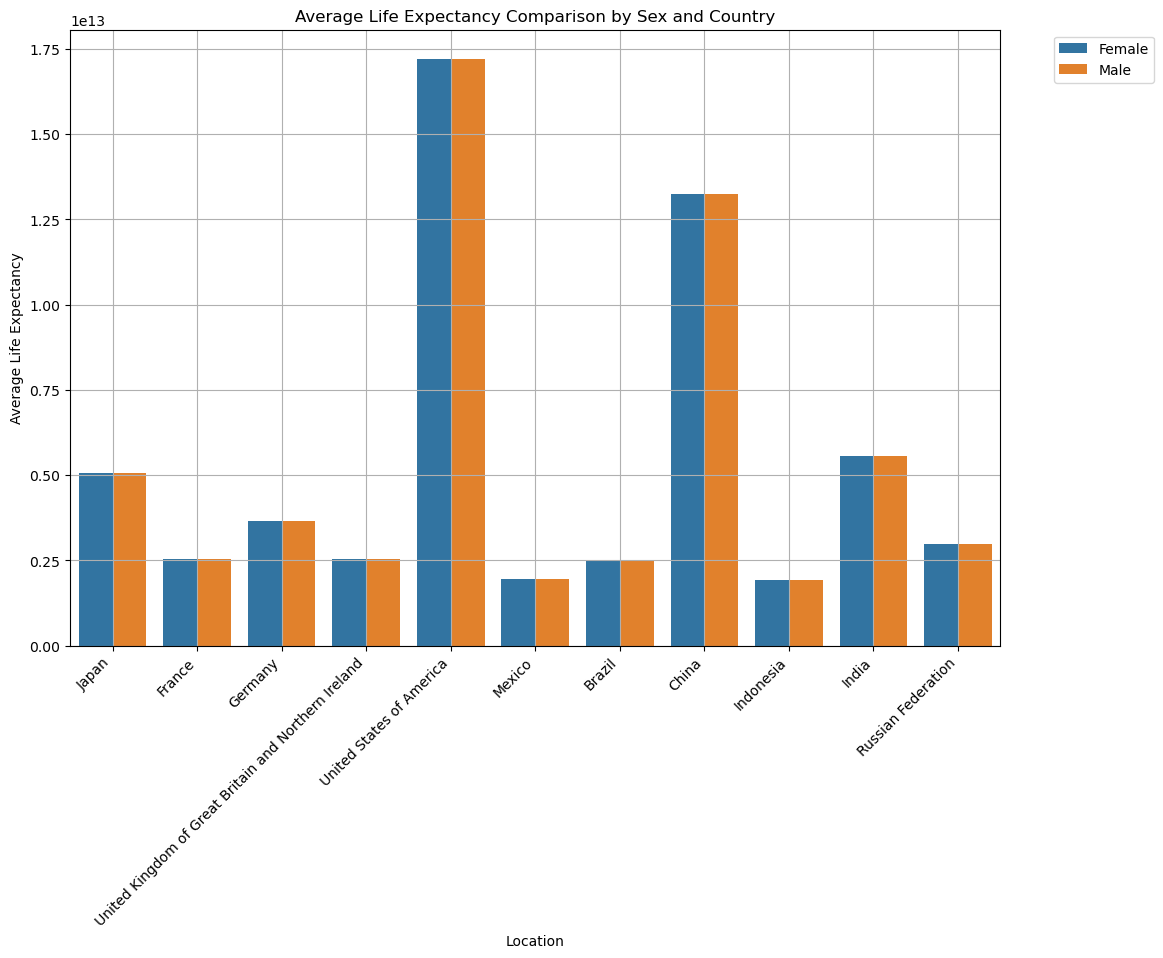

In [90]:
df_life = df2.groupby(['Location', 'Period', 'Sex'], as_index=False)['LifeExpectancy'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x='Location', y='GDP', hue='Sex', data=df_gdp, ci=None, dodge=True, order=df_life.groupby('Location')['LifeExpectancy'].mean().sort_values(ascending=False).index)
plt.title('Average Life Expectancy Comparison by Sex and Country')
plt.xlabel('Location')
plt.ylabel('Average Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


/var/folders/94/s_521g291tv9nnx7jvql6hdm0000gq/T/ipykernel_94328/1713322646.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Location', y='GDP', hue='Sex', data=df_gdp, ci=None, dodge=True)


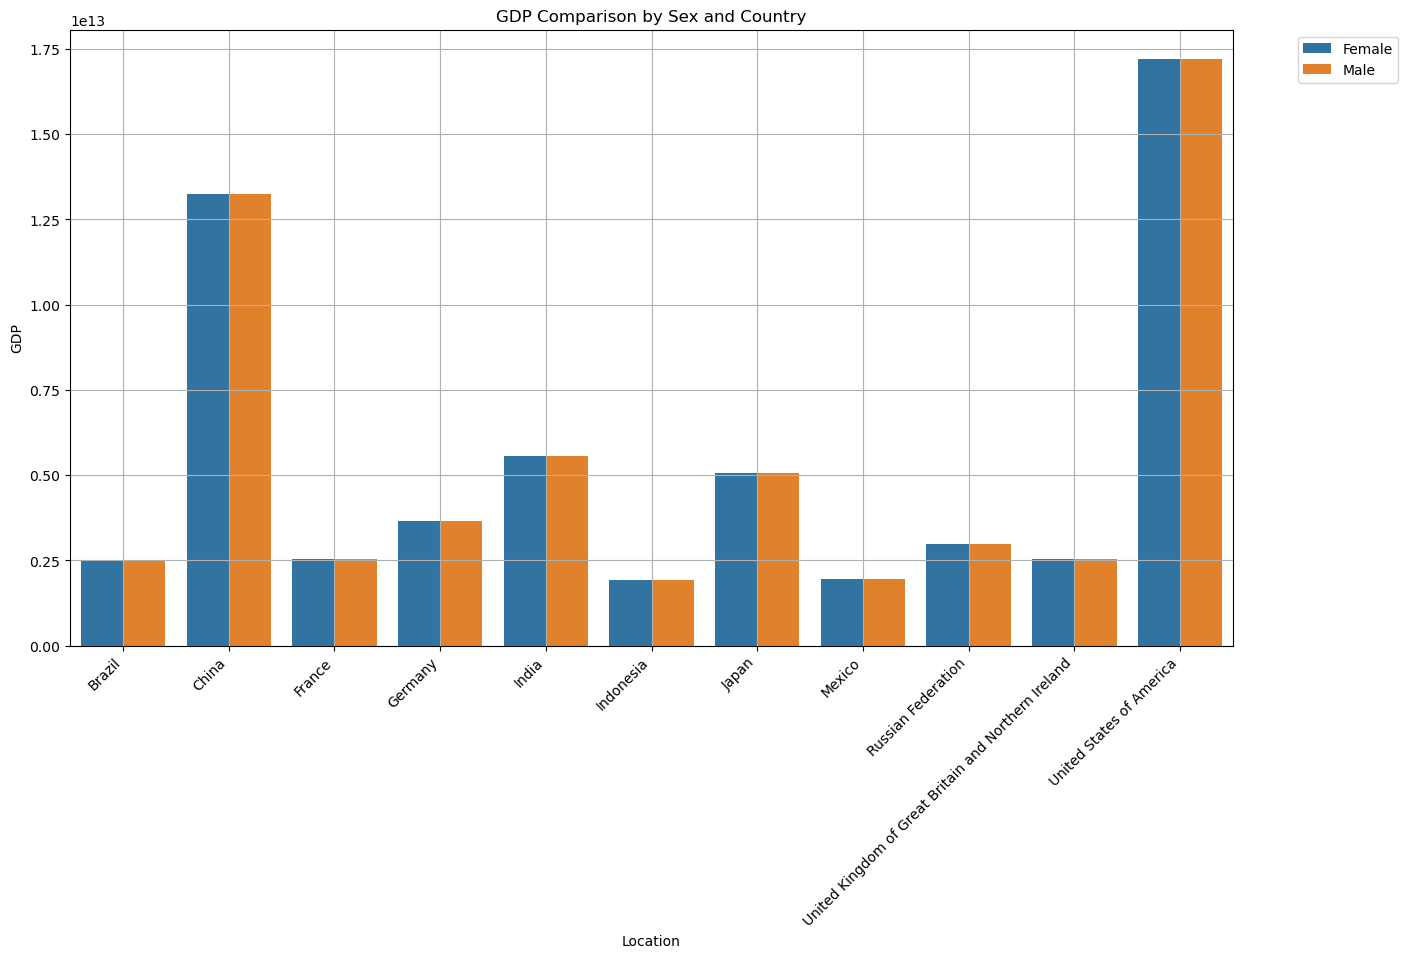

In [89]:
df_gdp = df2.groupby(['Location', 'Period', 'Sex'])['GDP'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='Location', y='GDP', hue='Sex', data=df_gdp, ci=None, dodge=True)
plt.title('GDP Comparison by Sex and Country')
plt.xlabel('Location')
plt.ylabel('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.show()

1. Life Expectancy差异的可视化
时间趋势：
使用折线图或点图，分别以不同的国家为颜色，时间为 x 轴，life expectancy 为 y 轴，探索不同国家在不同年份的 life expectancy 变化趋势。
可以使用 seaborn 或 matplotlib 进行绘图。
性别差异：
创建堆积条形图，比较男性和女性在不同国家和年份的 life expectancy。
进一步分析性别差异的趋势和模式。
年龄组差异：
对于特定国家和年份，使用堆积条形图或热力图来比较不同年龄组的 life expectancy。
看看是否有明显的年龄模式。
2. GDP对Life Expectancy的影响
散点图：
创建散点图，以 GDP 为 x 轴，life expectancy 为 y 轴，每个点代表一个国家，颜色表示不同年份。
考察不同国家之间以及同一国家在不同年份之间的关系。
GDP分组比较：
将 GDP 分成几个范围，然后对每个范围内的国家绘制 boxplot，比较它们的 life expectancy。
这有助于查看 GDP 水平对 life expectancy 的整体影响。
3. 区域性比较
区域趋势：
对于每个大洲或地区，分析 life expectancy 的整体趋势，并查看是否有一些地理区域上的差异。
GDP与医疗效率的关系：
创建 scatter plot，以 GDP 为 x 轴，医疗指标（可能是 'Tx - person-years lived above age x'）为 y 轴，每个点代表一个国家。
4. 数据分析
相关性分析：
使用 pandas 的 corr() 方法，分析 life expectancy 与其他列（如 GDP 和医疗指标）之间的相关性。
5. 数据探索
数据分布：
绘制 life expectancy、GDP 和医疗指标的直方图，查看它们的分布情况。

In [9]:
disease_df = pd.read_csv('non-communicable_diseases.csv')
disease_df.head()

,Unnamed: 0,Region_Code,SpatialDimValueCode,Location,Period,Sex,FactValueNumeric,FactValueNumeric.1,FactValueNumeric.2,FactValueNumeric.3,FactValueNumericHigh,FactValueNumericHigh.1,FactValueNumericHigh.2,FactValueNumericHigh.3,FactValueNumericLow,FactValueNumericLow.1,FactValueNumericLow.2,FactValueNumericLow.3
0,non-communicable_diseases,NaN,NaN,NaN,NaN,NaN,Cardiovascular diseases,Diabetes mellitus,Malignant neoplasms,Respiratory diseases,Cardiovascular diseases,Diabetes mellitus,Malignant neoplasms,Respiratory diseases,Cardiovascular diseases,Diabetes mellitus,Malignant neoplasms,Respiratory diseases
1,0,AMR,BRA,Brazil,2000.0,Female,442596.0,65949.0,207022.0,111660.0,487343.0,75314.0,228142.0,123246.0,386808.0,56471.0,184424.0,90305.0
2,1,AMR,BRA,Brazil,2000.0,Male,459255.0,59412.0,219764.0,121771.0,504280.0,68176.0,243975.0,132609.0,405489.0,50827.0,195712.0,104461.0
3,2,AMR,BRA,Brazil,2001.0,Female,445626.0,65327.0,214525.0,113369.0,490441.0,74580.0,235949.0,125192.0,389459.0,55821.0,190789.0,91927.0
4,3,AMR,BRA,Brazil,2001.0,Male,463681.0,58978.0,227372.0,123001.0,508787.0,67587.0,251761.0,134000.0,409351.0,50374.0,202023.0,105479.0
